In [1]:
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from ipywidgets import interact, FloatSlider


In [2]:
class blackScholes:
    
    # Computing european call and put prices using the closed form solution 
    # of the Black-Scholes equation.
    
    def __init__(self, S, X, T, r, sigma):
        '''
        S: Price of underlying asset
        X: Strike price of option
        T: Time till expiration
        r: Risk-free interest rate
        sigma: Volatility of risky asset
        '''
        self.S = S
        self.X = X
        self.T = T
        self.r = r
        self.sigma = sigma
    
    def d1(self):
        return (np.log(self.S/self.X)+(self.r+0.5*(self.sigma**2))*self.T)/(self.sigma*(self.T**0.5))

    def d2(self):
        return (np.log(self.S/self.X)+(self.r-0.5*(self.sigma**2))*self.T)/(self.sigma*(self.T**0.5))
    
    def callPrice(self):
        return self.S*norm.cdf(self.d1(), 0, 1)-self.X*np.exp(-self.r*self.T)*norm.cdf(self.d2(), 0, 1)
    
    def putPrice(self):
        return self.X*np.exp(-self.r*self.T)*norm.cdf(-self.d2(), 0, 1)-self.S*norm.cdf(-self.d1(), 0, 1)


In [3]:
def optionPrice(S, X, T, r, sigma):
    eurOption = blackScholes(S, X, T, r, sigma)
    print('Call price is ' + str(np.round(eurOption.callPrice(), 2)) + ' and Put price is ' + str(np.round(eurOption.putPrice(), 2)))


In [4]:
optionPrice(100, 100, 1, 0.05, 0.2)


Call price is 10.45 and Put price is 5.57


In [5]:
def optionPriceHeatmap(minSpot, maxSpot, X, T, r, minVol, maxVol):
    '''
    X: Strike price of option
    T: Time till expiration
    r: Risk-free interest rate
    minVol: Generate European option prices with volatility at least minVol
    maxVol: Generate European option prices with volatility at most maxVol
    minSpot: Generate European option prices with spot price at least minSpot
    maxSpot: Generate European option prices with spot price at most maxSpot
    '''
    
    # Given a fixed strike price, time till expiration and risk-free interest rate, we would
    # like to calculate the call or put price of an option for varying spot prices and varying
    # volatilities. We present this in the form of a heatmap.
    
    spotPrices = np.linspace(minSpot, maxSpot, 10)
    vols = np.linspace(minVol, maxVol, 10)
    callGrid = np.empty([len(vols), len(spotPrices)])
    putGrid = np.empty([len(vols), len(spotPrices)])
    for i, sigma in enumerate(vols):
        for j, S in enumerate(spotPrices):
            callGrid[i][j] = blackScholes(S, X, T, r, sigma).callPrice()
            putGrid[i][j] = blackScholes(S, X, T, r, sigma).putPrice()
    
    csfont = {'fontname':'Helvetica'}
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.heatmap(callGrid, ax=ax[0], cmap='viridis', annot=True, fmt=".2f")
    ax[0].set_title('Call Option Prices for Strike =' + str(X), fontsize=16, **csfont)
    ax[0].set_xlabel('Spot Price', fontsize=14, **csfont)
    ax[0].set_ylabel('Volatility', fontsize=14, **csfont)
    ax[0].set_xticklabels(np.round(spotPrices, 2))
    ax[0].set_yticklabels(np.round(vols, 2))
    sns.heatmap(putGrid, ax=ax[1], cmap='viridis', annot=True, fmt=".2f")
    ax[1].set_title('Put Option Prices for Strike =' + str(X), fontsize=16, **csfont)
    ax[1].set_xlabel('Spot Price', fontsize=14, **csfont)
    ax[1].set_ylabel('Volatility', fontsize=14, **csfont)
    ax[1].set_xticklabels(np.round(spotPrices, 2))
    ax[1].set_yticklabels(np.round(vols, 2))
    plt.tight_layout()
    plt.savefig('Black_scholes_european_heatmap.png', dpi=800)
    plt.show()


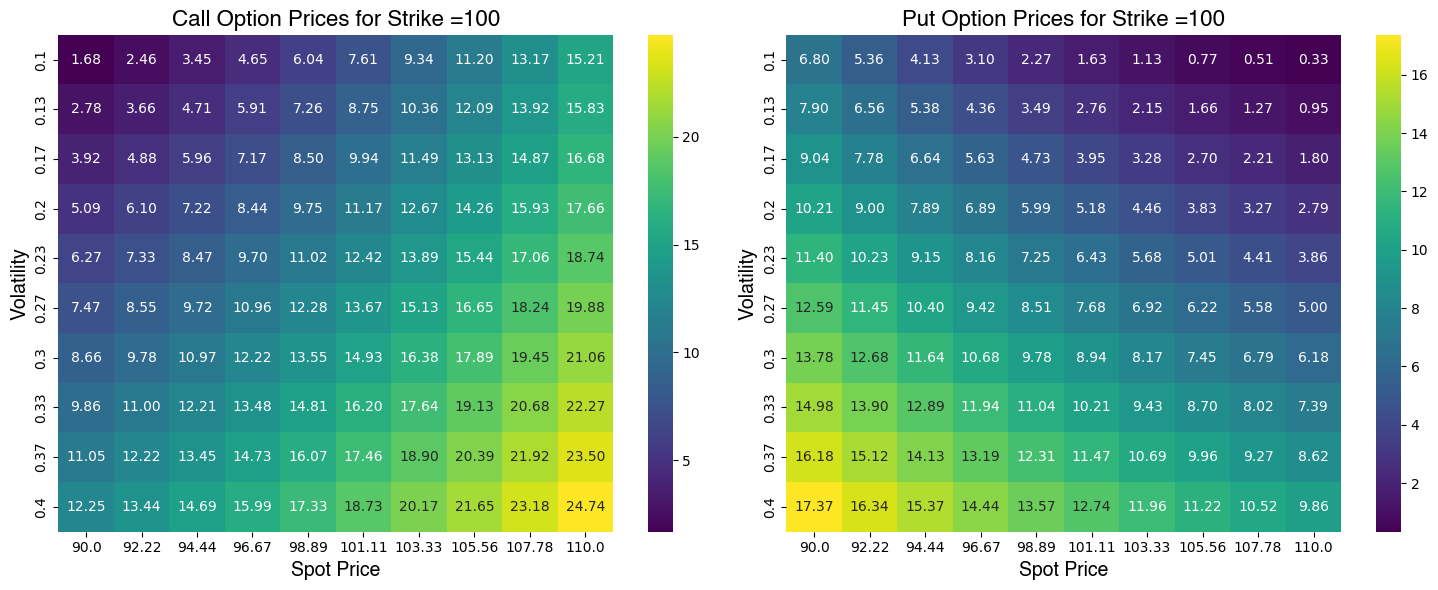

In [6]:
optionPriceHeatmap(90, 110, 100, 1, 0.05, 0.1, 0.4)


In [7]:
def optionProfitabilityHeatmap(minSpot, maxSpot, X, T, r, minVol, maxVol):
    '''
    X: Strike price of option
    T: Time till expiration
    r: Risk-free interest rate
    minVol: Generate European option prices with volatility at least minVol
    maxVol: Generate European option prices with volatility at most maxVol
    minSpot: Generate European option prices with spot price at least minSpot
    maxSpot: Generate European option prices with spot price at most maxSpot
    '''
    
    # Given a fixed strike price, time till expiration and risk-free interest rate, we would
    # like to calculate the profitability of a call or put option given the price of the
    # underlying at expiration. This is presented as a heat map with a slider to adjust the
    # price of the underlying at expiration.
    
    def genData(spotRange, X, T, r, volRange, F):
        spotPrices = np.linspace(minSpot, maxSpot, 10)
        vols = np.linspace(minVol, maxVol, 10)
        callProfGrid = np.empty([len(vols), len(spotPrices)])
        putProfGrid = np.empty([len(vols), len(spotPrices)])
        for i, sigma in enumerate(vols):
            for j, S in enumerate(spotPrices):
                callProfGrid[i][j] = -blackScholes(S, X, T, r, sigma).callPrice()-X+F
                putProfGrid[i][j] = -blackScholes(S, X, T, r, sigma).putPrice()+X-F
        return spotPrices, vols, callProfGrid, putProfGrid
    
    def genHeatmap(F=X):
        csfont = {'fontname':'Helvetica'}
        fig, ax = plt.subplots(1, 2, figsize=(15, 6))
        spotPrices, vols, callProfGrid, putProfGrid = genData((minSpot, maxSpot), X, T, r, (minVol, maxVol), F)
        sns.heatmap(callProfGrid, ax=ax[0], cmap='RdYlGn', annot=True, fmt='.2f', vmin=-30, vmax=30)
        ax[0].set_title('Call Option Profitability for Strike =' + str(X), fontsize=16, **csfont)
        ax[0].set_xlabel('Spot Price', fontsize=14, **csfont)
        ax[0].set_ylabel('Volatility', fontsize=14, **csfont)
        ax[0].set_xticklabels(np.round(spotPrices, 2))
        ax[0].set_yticklabels(np.round(vols, 2))
        sns.heatmap(putProfGrid, ax=ax[1], cmap='RdYlGn', annot=True, fmt='.2f', vmin=-30, vmax=30)
        ax[1].set_title('Put Option Profitability for Strike =' + str(X), fontsize=16, **csfont)
        ax[1].set_xlabel('Spot Price', fontsize=14, **csfont)
        ax[1].set_ylabel('Volatility', fontsize=14, **csfont)
        ax[1].set_xticklabels(np.round(spotPrices, 2))
        ax[1].set_yticklabels(np.round(vols, 2))
        plt.tight_layout()
        plt.savefig('Black_scholes_european_profitability_heatmap.png', dpi=800)
        plt.show()
        
    interact(genHeatmap, F=FloatSlider(value=X, min=X*0.7, max=X*1.3, step=0.01, description='Expiration Price'))


In [8]:
optionProfitabilityHeatmap(90, 110, 100, 1, 0.05, 0.1, 0.4)


interactive(children=(FloatSlider(value=100.0, description='Expiration Price', max=130.0, min=70.0, step=0.01)…